In [6]:
import plotly.express as ex

# Goodness of fit

In [7]:
import numpy as np
from scipy import stats
rng = np.random.default_rng()
x = stats.uniform.rvs(size=75, random_state=rng)

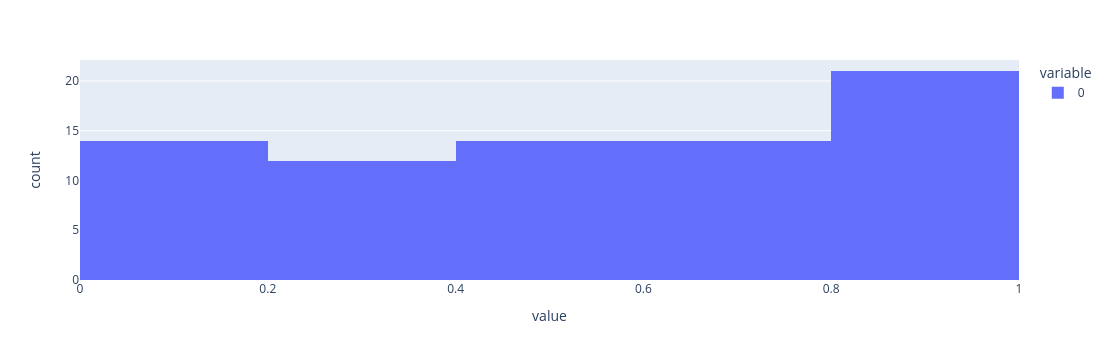

In [34]:
ex.histogram(x)

In [35]:
loc, scale = np.mean(x), np.std(x, ddof=1)
loc, scale

(0.5373675168571563, 0.3018575007187901)

In [36]:
cdf = stats.norm(loc, scale).cdf
stats.ks_1samp(x, cdf)

KstestResult(statistic=0.1148076222013018, pvalue=0.25599061726604483, statistic_location=0.696943112447806, statistic_sign=-1)

In [37]:
known_params = {'loc': loc, 'scale': scale}
res = stats.goodness_of_fit(stats.norm, x, known_params=known_params,
                            statistic='ks', random_state=rng)
res.statistic, res.pvalue

(0.1148076222013018, 0.2576)

In [38]:
res = stats.goodness_of_fit(stats.norm, x, statistic='ks',
                            random_state=rng)
res.statistic, res.pvalue

(0.1148076222013018, 0.0155)

In [39]:
res = stats.goodness_of_fit(stats.norm, x, statistic='ad',
                            random_state=rng)
res.statistic, res.pvalue

(1.52602735302861, 0.0006)

# Multivariate normal

In [55]:
x = np.random.multivariate_normal(np.zeros(3), np.diag([3, 7, 10]), 1000000)

In [56]:
np.mean(x, axis=0)

array([ 0.00209866, -0.00019803, -0.00011677])

In [57]:
np.cov(x.T)

array([[ 3.00378362e+00, -6.68835427e-03,  6.83265862e-03],
       [-6.68835427e-03,  7.01549690e+00, -7.96303201e-03],
       [ 6.83265862e-03, -7.96303201e-03,  9.99773493e+00]])

# Other

In [1]:
from tracking.target import ConstantVelocityTarget
from tracking.kalman import kalman_pv
from tracking.motion import ConstantVelocityModel

In [2]:
t = ConstantVelocityTarget()
t.true_states(1, 10)

array([[  0.,   0.,   0.,  30.,   0.,   0.],
       [ 30.,   0.,   0.,  30.,   0.,   0.],
       [ 60.,   0.,   0.,  30.,   0.,   0.],
       [ 90.,   0.,   0.,  30.,   0.,   0.],
       [120.,   0.,   0.,  30.,   0.,   0.],
       [150.,   0.,   0.,  30.,   0.,   0.],
       [180.,   0.,   0.,  30.,   0.,   0.],
       [210.,   0.,   0.,  30.,   0.,   0.],
       [240.,   0.,   0.,  30.,   0.,   0.],
       [270.,   0.,   0.,  30.,   0.,   0.]])

In [3]:
kf = kalman_pv(ConstantVelocityModel(), 1)

In [4]:
kf.predict(1)

In [24]:
kf.update(np.array([1, 1, 1]))

In [25]:
kf.x

array([[0.92105263],
       [0.92105263],
       [0.92105263],
       [0.59210526],
       [0.59210526],
       [0.59210526]])

In [22]:
kf.x_hat

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [23]:
kf.P

array([[0.22580645, 0.        , 0.        , 0.14516129, 0.        ,
        0.        ],
       [0.        , 0.22580645, 0.        , 0.        , 0.14516129,
        0.        ],
       [0.        , 0.        , 0.22580645, 0.        , 0.        ,
        0.14516129],
       [0.14516129, 0.        , 0.        , 1.12903226, 0.        ,
        0.        ],
       [0.        , 0.14516129, 0.        , 0.        , 1.12903226,
        0.        ],
       [0.        , 0.        , 0.14516129, 0.        , 0.        ,
        1.12903226]])

In [15]:
kf.P_hat

array([[2.33333333, 0.        , 0.        , 1.5       , 0.        ,
        0.        ],
       [0.        , 2.33333333, 0.        , 0.        , 1.5       ,
        0.        ],
       [0.        , 0.        , 2.33333333, 0.        , 0.        ,
        1.5       ],
       [1.5       , 0.        , 0.        , 2.        , 0.        ,
        0.        ],
       [0.        , 1.5       , 0.        , 0.        , 2.        ,
        0.        ],
       [0.        , 0.        , 1.5       , 0.        , 0.        ,
        2.        ]])